Описание данных
Имеются следующие данные:

date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)
name – имя пользователя
transaction – статус транзакции
minute* – сколько минут прошло с начала дня
*Доступна в данных с 5 шага.

In [3]:
import pandas as pd

In [1]:
path = 'transaction_data.csv'

In [4]:
data = pd.read_csv(path)

In [5]:
data.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [6]:
data.shape

(5315, 3)

In [7]:
data.dtypes

date           object
name           object
transaction    object
dtype: object

In [8]:
data.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:35:03,Masha_Ozerova,successfull
freq,6,112,3692


In [9]:
data.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [14]:
data.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

In [15]:
data.transaction.value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

In [16]:
import seaborn as sns

In [23]:
transact = data.groupby('transaction', as_index=False) \
    .agg({'date': 'count'})
transact

,transaction,date
0,cancelled,1619
1,error,4
2,successfull,3692


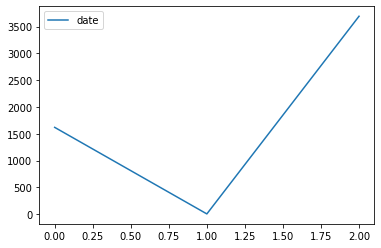

In [24]:
transact.plot()

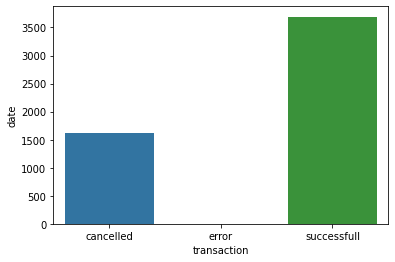

In [25]:
sns.barplot(x='transaction', y= 'date', data=transact)

In [28]:
sucsess_transact = data[data.transaction == 'successfull'] \
    .groupby('name', as_index=False) \
    .agg({'date': 'count'})
sucsess_transact.describe()

,date
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


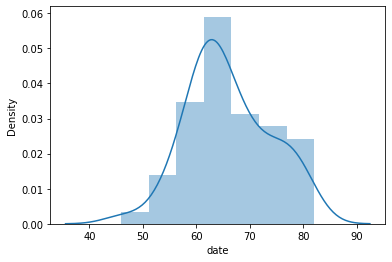

In [36]:
sns.distplot(sucsess_transact.date)

In [29]:
sucsess_transact.head()

,name,date
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68


In [33]:
sum = sucsess_transact.date.sum()
sum

3692

In [31]:
sucsess_transact['per_cent'] = sucsess_transact['date']/sum

In [32]:
sucsess_transact.head()

,name,date,per_cent
0,Ekaterina_Fedorova,72,0.019502
1,Ekaterina_Ivanova,59,0.015980
2,Ekaterina_Lesnova,63,0.017064
3,Ekaterina_Ozerova,72,0.019502
4,Ekaterina_Petrova,68,0.018418


In [37]:
new_path = 'transaction_data_updated.csv'

In [40]:
df1 = pd.read_csv(new_path)
df1.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [48]:
df2 = df1.groupby(['name', 'minute'], as_index=False) \
    .agg({'transaction': 'count'}) \
    #.pivot(index='ad_id', columns='event', values='time').reset_index()

In [54]:
df2.head()

,name,minute,transaction
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3


In [53]:
df = df2.pivot(index='minute', columns='name', values='transaction')
df.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,NaN,3.0,1.0,1.0,4.0,1.0,3.0,NaN,NaN,1.0
1,4.0,4.0,NaN,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,NaN,NaN,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,NaN,1.0,2.0,1.0,3.0,1.0
3,3.0,NaN,2.0,NaN,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,NaN,3.0,4.0,1.0,NaN
4,3.0,NaN,NaN,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,1.0


In [59]:
import pandas as pd
new_path = 'transaction_data_updated.csv'
df = pd.read_csv(new_path)

user_vs_minute_pivot = df.groupby(['name', 'minute'], as_index=False) \
    .agg({'transaction': 'count'}) \
    .pivot(index='minute', columns='name', values='transaction').reset_index() \
    .fillna(0)


user_vs_minute_pivot.head()

name,minute,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
0,0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


In [64]:
trans_min = df.groupby(['minute'], as_index=False) \
    .agg({'transaction': 'count'})
trans_min.head()

,minute,transaction
0,0,111
1,1,145
2,2,123
3,3,129
4,4,92


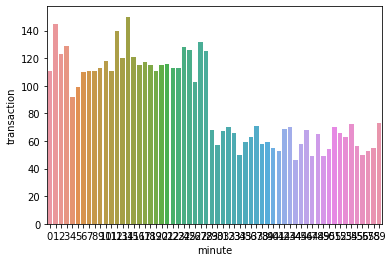

In [65]:
sns.barplot(x='minute', y= 'transaction', data=trans_min)

In [66]:
df.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [69]:
df.dtypes

date           object
name           object
transaction    object
minute          int64
dtype: object

In [71]:
df['date'] = pd.to_datetime(df.date)

In [72]:
df.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [77]:
df['true_minute'] = df['date'].dt.minute + df['date'].dt.hour*60

In [78]:
df.head()

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


In [79]:
trans_min_true = df.groupby(['true_minute'], as_index=False) \
    .agg({'transaction': 'count'})
trans_min_true.head()

,true_minute,transaction
0,0,64
1,1,77
2,2,68
3,3,65
4,4,57


In [81]:
df.true_minute.value_counts()

14    80
1     77
72    75
27    73
59    73
      ..
65    47
44    46
8     46
64    35
89     5
Name: true_minute, Length: 90, dtype: int64

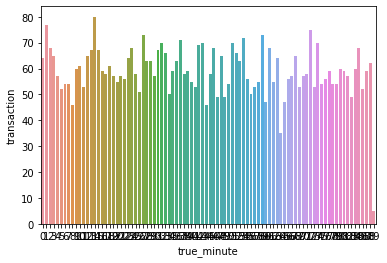

In [80]:
sns.barplot(x='true_minute', y= 'transaction', data=trans_min_true)

In [58]:
import pandas as pd
new_path = 'transaction_data_updated.csv'
df = pd.read_csv(new_path)
df.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
